In [ ]:
#Credit EDA Case Study

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy,pandas,matplotlib,seaborn, os, glob, Itertools packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
import glob
import itertools

In [3]:
#Print the plot within the page
%matplotlib inline

In [4]:
# set seaborn theme if you prefer
sns.set(style="white")

# Part1: Application Data Analysis

## On this part of the exploration, we will load application data and explore variables that are impacting loan repayment


### Import and read the Loan application Data. Store it in a variable called `df_application_data`.

In [5]:
# read data
df_application_data = pd.read_csv("application_data.csv")
#describe the data frame to find the summary
df_application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
#Understand the rows and columns of application dataframe
df_application_data.shape

(307511, 122)

In [7]:
#Lookup top 10 rows for the application data
df_application_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#To understand the data, we need to lookup the columns of the Application dataframe.
df_application_data.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

## Function to generate missing value count  and Percentage
### It is important that we identify the missing value count and the percentage of missing to understand their impact to the analysis later. 

## Identify missing values in the loan application data frames
### Filter out the variables which are having more than 50% of missing values. They provide less information for EDA purpose

In [9]:
#Let us check the shape of the Application data frame before dropping some columns due to high missing values
df_application_data.shape

(307511, 122)

In [10]:
#Remove any columns which are having more than 50% missing values
df_application_data_new = df_application_data.loc[:, df_application_data.isin([' ','NULL',0]).count() < .5]

df_application_data.dropna(axis=1, thresh=int(0.5*len(df_application_data)), inplace=True)
#print the shape after removing the columns
df_application_data.shape

(307511, 81)

In [11]:
percent_missing_app = df_application_data.isnull().sum()*100 / len(df_application_data)
app_missing_value_df = pd.DataFrame({'column_name': df_application_data.columns,
                                 'percent_missing': percent_missing_app})
app_missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
app_missing_value_df

,column_name,percent_missing
FLOORSMAX_AVG,FLOORSMAX_AVG,49.760822
FLOORSMAX_MODE,FLOORSMAX_MODE,49.760822
FLOORSMAX_MEDI,FLOORSMAX_MEDI,49.760822
YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_AVG,48.781019
YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MODE,48.781019
YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MEDI,48.781019
TOTALAREA_MODE,TOTALAREA_MODE,48.268517
EMERGENCYSTATE_MODE,EMERGENCYSTATE_MODE,47.398304
OCCUPATION_TYPE,OCCUPATION_TYPE,31.345545
EXT_SOURCE_3,EXT_SOURCE_3,19.825307


## Data imbalance and handling outliers
### For EDA purpose, it is important to understand imbalance in data and understand how to treat them

Understand the data imbalance on the application data
Target is the column we analysis now . 
Remember the definition of the target column (Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases))

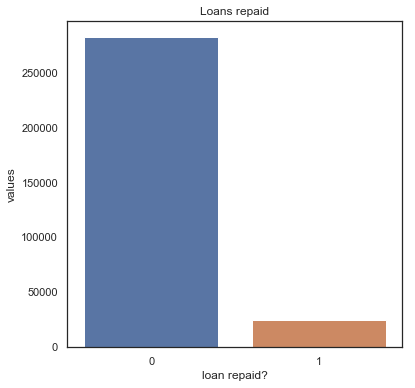

In [12]:
#get the target value count
target = df_application_data["TARGET"].value_counts()
#create dataframe for the target variable
df_target = pd.DataFrame({'loan repaid?': target.index,
                   'values': target.values
                  })
#plot the graph
plt.figure(figsize = (6,6))
plt.title('Loans repaid')
sns.set_color_codes('dark')
#Let draw using bar chart
sns.barplot(x = 'loan repaid?', y='values', data=df_target)
locs, labels = plt.xticks()
plt.show()

<font color='blue'>

<b> Inference from the graph We can clearly see the data imbalance between 0 and 1. The number of applicant who are re-paid is significant much more than the number of applicant who are defaulted payments. This is a good indicator that the loan process is healthly with lot of applicant repaying the loans. Let us now check the percentage split of these number to understand the ratio</b>
</font>

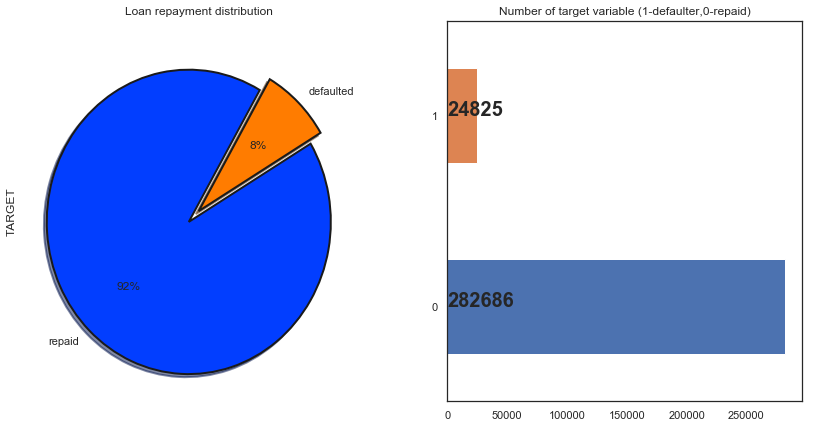

In [13]:
#creating the same Target values graph using Pie chart to understand the ratio of distribution
plt.figure(figsize=(14,7))
plt.subplot(121)
df_application_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("bright",7),startangle = 60,labels=["repaid","defaulted"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Loan repayment distribution")

plt.subplot(122)
ax = df_application_data["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(df_application_data["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Number of target variable (1-defaulter,0-repaid)")
plt.show()


<font color='blue'>
<b>From the above graph we can infer that 92 percent of the applicants are repaying their loans. Only 8 percent are defaulting.This shows loan approval process is good and risk for the insitution is low </b>
</font>

In [14]:
#Let us find out the data types of the columns from the application data frame
df_application_data.dtypes.value_counts()

int64      41
float64    27
object     13
dtype: int64

In [15]:
#Now identify any outliers for the DAYS_BIRTH column
(df_application_data.DAYS_BIRTH / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

<font color='blue'>

<b> From the above data, we can clearly see there is no outlier in the data as max, min, mean and % spread of data are seems to be natural to the loan application. Hence we do not need to do anything on this column</b>
</font>

Let us know examine DAYS_EMPLOYED variable to find any anomalies in the data

In [16]:
(df_application_data.DAYS_EMPLOYED / 365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

<font color='blue'>

<b> We can clearly see a difference between max and min value where there is significant outlier in the data. Let us plot a graph to understand the spread of data </b>
</font>

Text(0.5,0,'Days Employed')

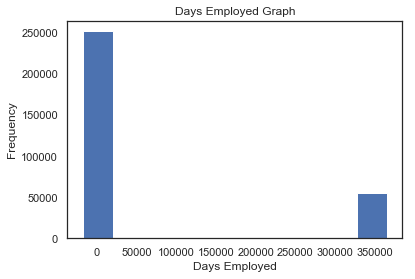

In [17]:
df_application_data.DAYS_EMPLOYED.plot.hist(title='Days Employed Graph')
plt.xlabel('Days Employed')

In [18]:
#Let us examine the median of this variable
df_application_data.DAYS_EMPLOYED.median()

-1213.0

In [19]:
# Let us find the normal and outlier data
outlier_data = df_application_data[df_application_data.DAYS_EMPLOYED == 365243]
normal_data = df_application_data[df_application_data.DAYS_EMPLOYED != 365243]

print('The outlier shape : ', outlier_data.shape[0])
print('The normal shape : ', normal_data.shape[0])

('The outlier shape : ', 55374)
('The normal shape : ', 252137)


In [20]:
#Find the percentage of outlier for the Target variable
print('The normal data are default on %0.2f%% of loans.' % (100 * outlier_data.TARGET.mean()))
print('The outliers are default on %0.2f%% of loans.' % (100 * normal_data.TARGET.mean()))

The normal data are default on 5.40% of loans.
The outliers are default on 8.66% of loans.


<font color='blue'>

<b> We can see that outliers are low for the defaulter. We need to identify and handle the impact of this variable for our analysis </b>
</font>

/Users/hariharansrinivasan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Text(0.5,0,'DAYS EMPLOYED')

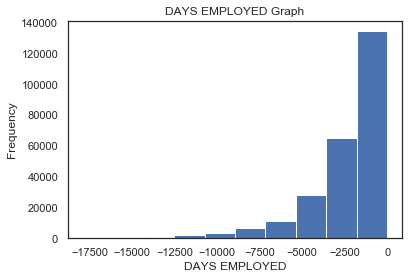

In [21]:
# Let us create a flag for this outlier which can be used for the analysis
df_application_data.DAYS_EMPLOYED_OUTLIERS = df_application_data.DAYS_EMPLOYED == 365243

#  Replace the outlier values with null
df_application_data.DAYS_EMPLOYED.replace({365243: np.nan}, inplace=True)

df_application_data.DAYS_EMPLOYED.plot.hist(title='DAYS EMPLOYED Graph')
plt.xlabel('DAYS EMPLOYED')

## Understand correlation of Application Data with the Target variable
### For EDA purpose, it is important to understand the correlation of each variables to the target variable where the loan applicant repaid or defaulted. The correlation will shows the impact on such variables to applicants repayment or non payment. This can help us understand the pattern in the loan application

In [22]:
#Correlation of top 15 correlation. The highest the correlation value, the more is the impact on target variable
application_correlation = df_application_data.corr()['TARGET'].sort_values()
#top_ten_positive_corr = round(application_correlation.tail(10).sort_values(ascending=False),3)
#top_ten_nagative_corr = round(application_correlation.head(10).sort_values(ascending=False),3)
# Display both positive and negative correlations
print('Top 10 correlations which are having positive impact to the Target:\n', application_correlation.tail(10).sort_values(ascending=False))
print('\nTop 10 correlations which are having negative impact to the Target:\n' , application_correlation.head(10).sort_values(ascending=False))

('Top 10 correlations which are having positive impact to the Target:\n', TARGET                         1.000000
DAYS_BIRTH                     0.078239
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
Name: TARGET, dtype: float64)
('\nTop 10 correlations which are having negative impact to the Target:\n', FLAG_DOCUMENT_6              -0.028602
AMT_CREDIT                   -0.030369
TOTALAREA_MODE               -0.032596
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64)


<font color='blue'>

<b> In the loan application data, the TARGET is either 0 or 1. Finding positive and negative correlation will help us understand is the data is trending towards zero where applicants repaid the loan. This may not be true for all the cases. Before we go into indentify inversion to this correlation, let us explore the variables which are having high (negative) correlation</b>
</font>

# Explore DAYS_BIRTH for understanding impact of Age to loan repayment pattern
## As per the column description, DAYS_BIRTH is Client's age in days at the time of application

In [23]:
#Understand the positive correlation between Target variable and age of the applicant
df_application_data['DAYS_BIRTH'] = abs(df_application_data['DAYS_BIRTH'])
df_application_data['DAYS_BIRTH'].corr(df_application_data['TARGET'])

-0.07823930830982712

<font color='blue'>

<b> We can see pattern in the correlation as the age increases the repayment value (Target = 0) is also increasing. Let us now plot a graph to understand and confirm this pattern </b>

</font>

Text(0,0.5,'Number of applicant')

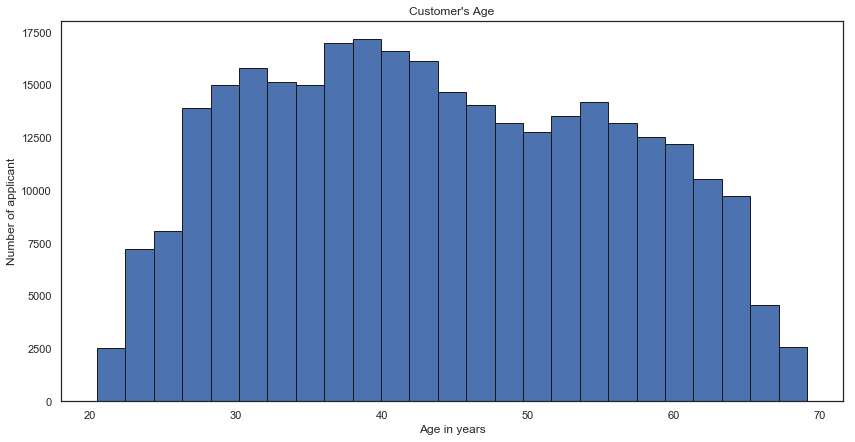

In [24]:
#Plot a histogram with converting age in years
plt.figure(figsize=(14,7))
plt.hist(df_application_data['DAYS_BIRTH'] / 365, edgecolor='k', bins=25)
plt.title('Customer\'s Age')
plt.xlabel('Age in years')
plt.ylabel('Number of applicant')

<font color='blue'>

<b> There is no outlier in the applicant's age data. But we need to understand it's relation to Target variable to understand the relation between applicant's repayment or default status </b>

</font>

Text(0.5,1,'Applicant age with loan status')

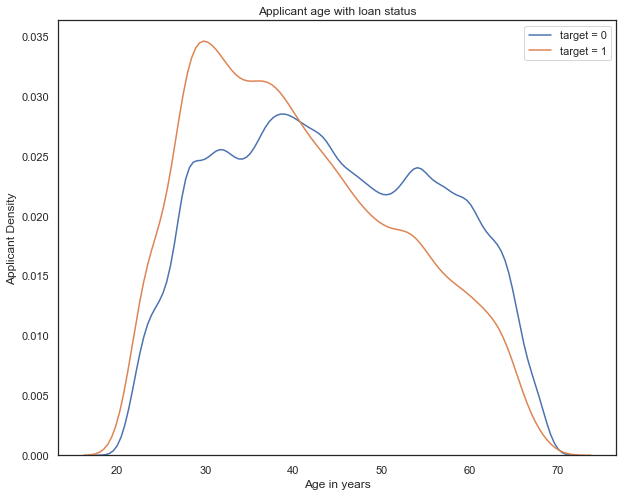

In [25]:
plt.figure(figsize=(10,8))
# plot age of the applicants who have repaid their loans
sns.kdeplot(df_application_data.loc[df_application_data['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label='target = 0')

# plot age of the applicants who have not repaid their loans
sns.kdeplot(df_application_data.loc[df_application_data['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label='target = 1')

# Plot age as years
plt.xlabel('Age in years')
plt.ylabel('Applicant Density')
plt.title('Applicant age with loan status')

<font color='blue'>

<b> We can see some pattern that defaulters density count is more on younger age compare to the older age. But unless we group the age to understand which brackets of age that the default trend is more evidence is difficult to understand </b>

</font>

In [26]:
# Extract age and target columns in to new data frame
df_age_with_target = df_application_data.loc[:, ['TARGET', 'DAYS_BIRTH']]
#Convert to years
df_age_with_target['YEARS_BIRTH'] = df_age_with_target['DAYS_BIRTH']/ 365

df_age_with_target['YEARS_BIRTH'] = pd.cut(df_age_with_target['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))
#Top 15 rows
df_age_with_target.head(15)

,TARGET,DAYS_BIRTH,YEARS_BIRTH
0,1,9461,"(25.0, 30.0]"
1,0,16765,"(45.0, 50.0]"
2,0,19046,"(50.0, 55.0]"
3,0,19005,"(50.0, 55.0]"
4,0,19932,"(50.0, 55.0]"
5,0,16941,"(45.0, 50.0]"
6,0,13778,"(35.0, 40.0]"
7,0,18850,"(50.0, 55.0]"
8,0,20099,"(55.0, 60.0]"
9,0,14469,"(35.0, 40.0]"


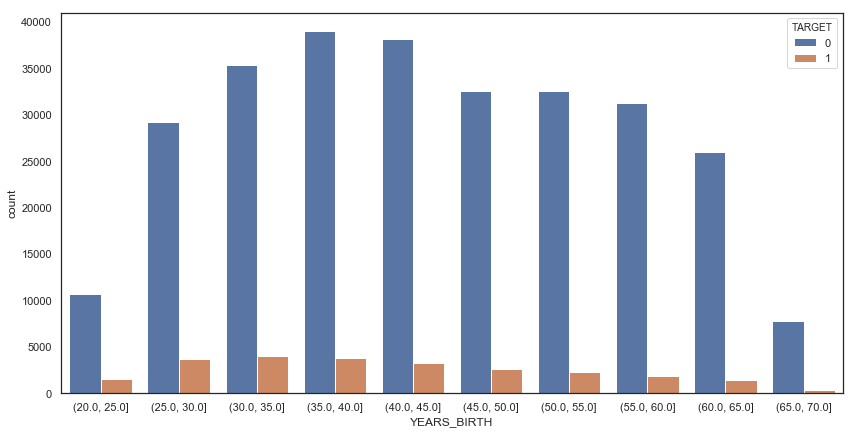

In [27]:
plt.figure(figsize=(14,7))
sns.countplot('YEARS_BIRTH', data=df_age_with_target, hue='TARGET')

In [28]:
df_age_with_target_groups = df_age_with_target.groupby('YEARS_BIRTH').mean()
df_age_with_target_groups['TARGET']

YEARS_BIRTH
(20.0, 25.0]    0.123036
(25.0, 30.0]    0.111436
(30.0, 35.0]    0.102814
(35.0, 40.0]    0.089414
(40.0, 45.0]    0.078491
(45.0, 50.0]    0.074171
(50.0, 55.0]    0.066968
(55.0, 60.0]    0.055314
(60.0, 65.0]    0.052737
(65.0, 70.0]    0.037270
Name: TARGET, dtype: float64

<font color='blue'>

<b> We can clearly see that mean value is decreasing as the age progresses. This proves the pattern that younger customers are likely to default more than the older customers. This may be due to the fact that youngers may not have stable income compare to the older age group. The stable income will prompt re-payment. Now, this data does not aim to stop giving loans to the younger age group. But institution need to take additional precautious steps and may require to have a separate scheme with longer duration with less EMI options </b>

</font>

# Explore external data source variables
## As per the column description, these variables are Normalized score from external data source. Analysing these variables will help us understand the risk
### We already established the age factor to the risk of repayment. Let us now find the correlation between age, external sources with Target variable to understand whether it has any factor in loan re-payment

In [29]:
#Correlation between target and external sources variable
external_datasource = df_application_data.loc[:, ['TARGET','DAYS_BIRTH', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
external_datasource_correlations = external_datasource.corr()
external_datasource_correlations

,TARGET,DAYS_BIRTH,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.078239,-0.160472,-0.178919
DAYS_BIRTH,-0.078239,1.000000,0.091996,0.205478
EXT_SOURCE_2,-0.160472,0.091996,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.205478,0.109167,1.000000


Text(0.5,1,'Correlation Heatmap')

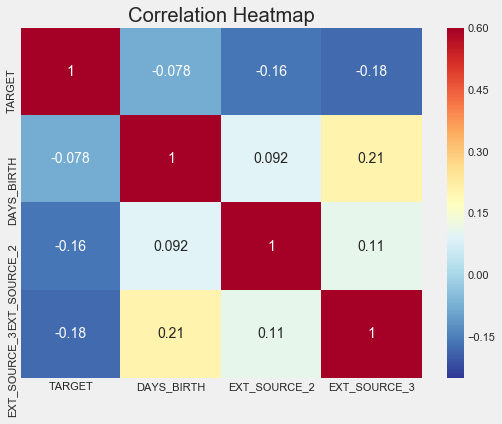

In [30]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))

# Plot heatmap for the correlation
sns.heatmap(external_datasource_correlations, cmap = plt.cm.RdYlBu_r, vmin = -0.25, vmax = 0.6, annot = True)
plt.title('Correlation Heatmap')

<font color='blue'>

<b> We can see that increase in external source value correlates with loan repayment. This shows some correlations with Target and External Source. Similarly, External source has some correlation with DAYS_BIRTH, We have to understand these negative and positive correlation to find the impact </b>

</font>

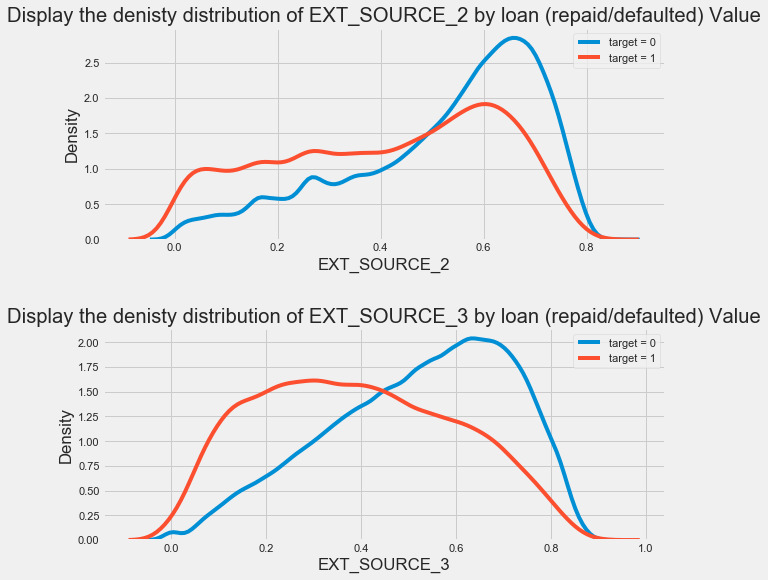

In [31]:
plt.figure(figsize=(10, 12))

#loop through the external source columns
for i, source in enumerate(['EXT_SOURCE_2', 'EXT_SOURCE_3']):
    # Create a subplot
    plt.subplot(3, 1, i + 1)
    # Plot for both repaid and defaulted loans
    sns.kdeplot(df_application_data.loc[df_application_data['TARGET'] == 0, source], label = 'target = 0')
    sns.kdeplot(df_application_data.loc[df_application_data['TARGET'] == 1, source], label = 'target = 1')
    
    
    plt.title('Display the denisty distribution of %s by loan (repaid/defaulted) Value' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

<font color='blue'>

<b> Above graphs shows some good relationship between External Source and loan re-payment pattern. But we cannot conclude anything evidently from this</b>

</font>

## Explore DAYS_EMPLOYED variable with Target

## Let us now explore the next variable which is in the top correlation with the Target variable
### Definition of this field is "How many days before the application the person started current employment"


In [32]:
df_application_data['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

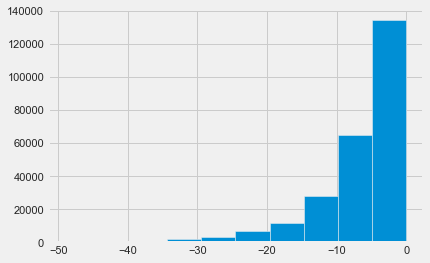

In [33]:
#Create a new dataframe from the application data
daysEmp_data = df_application_data[['TARGET','DAYS_EMPLOYED']]
daysEmp_data.loc[:,'YEARS_EMPLOYED'] = daysEmp_data['DAYS_EMPLOYED']/365
#plot a histogram 
daysEmp_data['YEARS_EMPLOYED'].hist()


<font color='blue'>

<b> We find that the distribution is not having any major outliers
Let us now fill the missing values with zero as it is the day of the appliation where the applicant is not having any employment details</b>

</font>

In [34]:
df_application_data[['DAYS_EMPLOYED']] = df_application_data[['DAYS_EMPLOYED']].fillna(value=0)

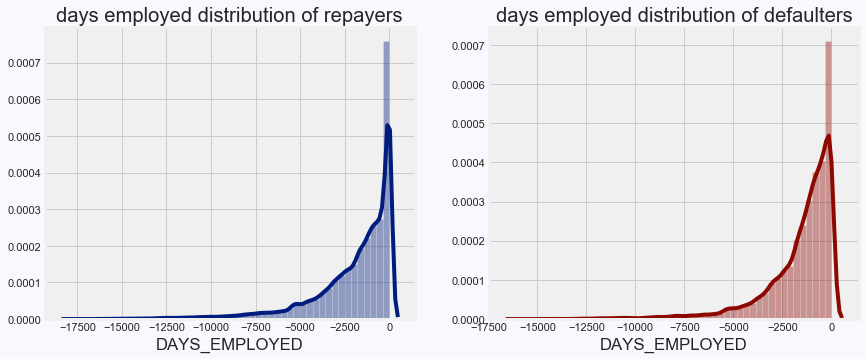

In [35]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(df_application_data[df_application_data["TARGET"]==0]["DAYS_EMPLOYED"],color="b")
plt.title("days employed distribution of repayers")

plt.subplot(122)
sns.distplot(df_application_data[df_application_data["TARGET"]==1]["DAYS_EMPLOYED"],color="r")
plt.title("days employed distribution of defaulters")

fig.set_facecolor("ghostwhite")

<font color='blue'>

<b> The distribution of employment information does not give any indication of it's impacting loan repayment. Let us now try to understand the correlation of DAYS_EMPLOYED with other high correlated columns</b>

</font>

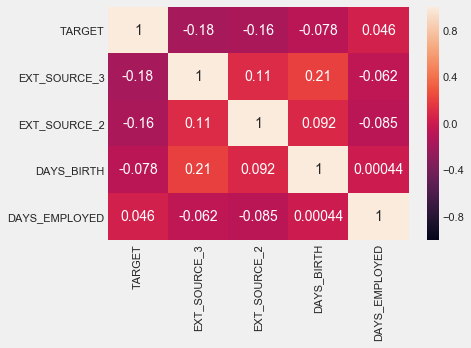

In [36]:
df_ext_src = df_application_data[['TARGET','EXT_SOURCE_3','EXT_SOURCE_2','DAYS_BIRTH','DAYS_EMPLOYED']] 
df_ext_src_corr = df_ext_src.corr()
sns.heatmap(df_ext_src_corr,vmin=-1.0,vmax=1.0,annot=True)



<font color='blue'>

<b>The Correlation establish the observation that target and DAYS_EMPLOYED are correlated to the applicant value as more number of years an applicant is employed his or her ability to pursue loan. But it has no major impact to loan repayment or defaulting condition </b>

</font>

## Explore NAME_EDUCATION_TYPE and NAME_INCOME_TYPE variables


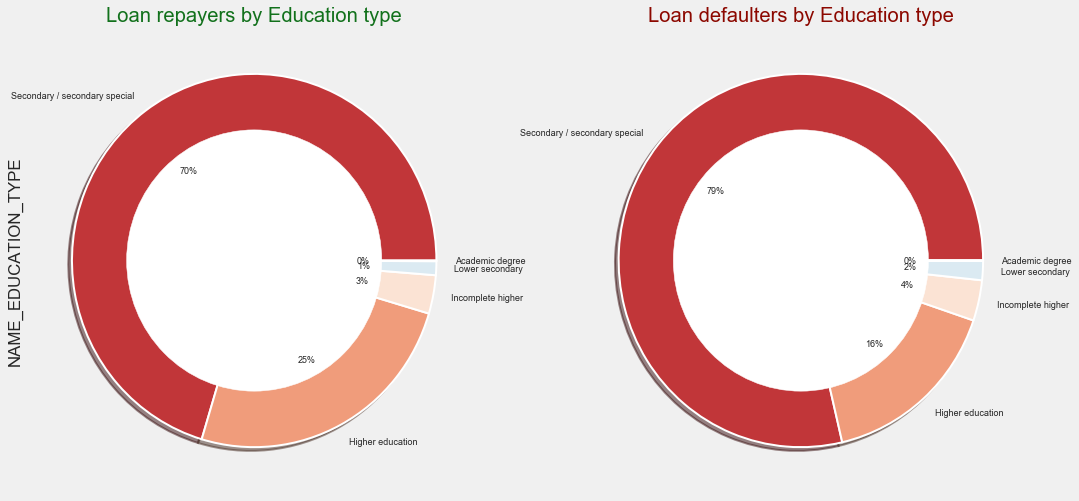

In [37]:
plt.figure(figsize=(16,8))
plt.subplot(121)
df_application_data[df_application_data["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=9,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("RdBu"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Loan repayers by Education type",color="g")

plt.subplot(122)
df_application_data[df_application_data["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=9,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("RdBu"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Loan defaulters by Education type",color="r")
plt.ylabel("")
plt.show()


<font color='blue'>

<b>The above graph shows some relation to loan repayment capacity in respect to applicant's education status. The clients who has higher education are less likely to default loans. Similarly, we can see some impact on Secondary education type as well.Now let us understand education type along with the income type to understand their relationship to earning </b>

</font>

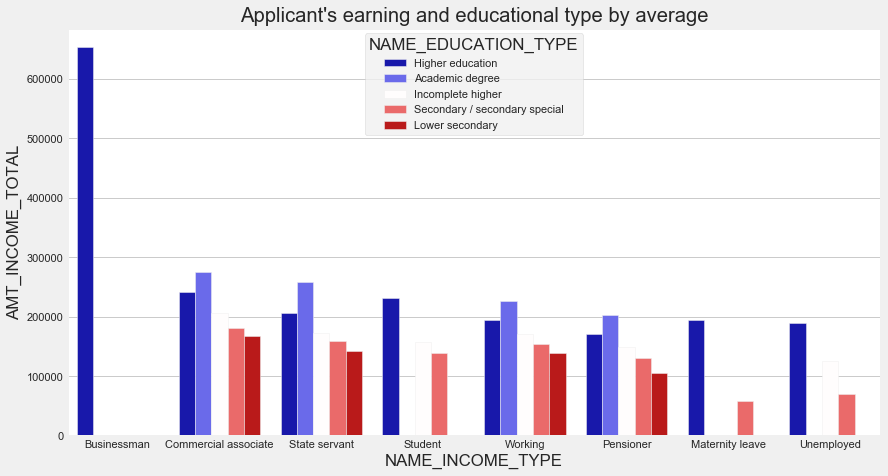

In [38]:
#group by education type and income type
education = df_application_data.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
fig = plt.figure(figsize=(13,7))
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=education,hue='NAME_EDUCATION_TYPE',palette="seismic")
ax.set_facecolor("w")
plt.title("Applicant's earning and educational type by average")
plt.show()

<font color='blue'>

<b>The above graph shows businessman with higher education has more average income and their proportion to the application is larger. It is natural that business people will pursue loans from financial organization for business development. But we do not need to raise this as a major risk </b>

</font>

# Part2: Previous Application Data Analysis

## On this part of the exploration, we will load previous application data and explore variables that are impacting loan repayment


### Import and read the Loan application Data. Store it in a variable called `df_previous_application_data`.

In [39]:
# read data
df_previous_application_data = pd.read_csv("previous_application.csv")
#Find the top rows of the data frame
df_previous_application_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [40]:
#Let's understand the previous application dataframe columns for analysis
df_previous_application_data.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

## Identify missing values in the previous application data frames
### Filter out the variables which are having more than 50% of missing values. They provide less information for EDA purpose


In [41]:
#df_previous_application_data.dropna(axis=1, thresh=int(0.5*len(df_previous_application_data)), inplace=True)
df_previous_application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [42]:
df_previous_application_data.dropna(axis=1, thresh=int(0.5*len(df_previous_application_data)), inplace=True)
#print the shape after removing the columns
df_previous_application_data.shape

(1670214, 33)

In [43]:
percent_missing = df_previous_application_data.isnull().sum()*100 / len(df_previous_application_data)
missing_value_df = pd.DataFrame({'column_name': df_previous_application_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
NAME_TYPE_SUITE,NAME_TYPE_SUITE,49.119754
DAYS_FIRST_DRAWING,DAYS_FIRST_DRAWING,40.298129
DAYS_TERMINATION,DAYS_TERMINATION,40.298129
DAYS_LAST_DUE,DAYS_LAST_DUE,40.298129
DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE_1ST_VERSION,40.298129
DAYS_FIRST_DUE,DAYS_FIRST_DUE,40.298129
NFLAG_INSURED_ON_APPROVAL,NFLAG_INSURED_ON_APPROVAL,40.298129
AMT_GOODS_PRICE,AMT_GOODS_PRICE,23.081773
AMT_ANNUITY,AMT_ANNUITY,22.286665
CNT_PAYMENT,CNT_PAYMENT,22.286366


# Explore NAME_CONTRACT_STATUS for understanding previous loan status
### Univariate analysis on the loan status variable

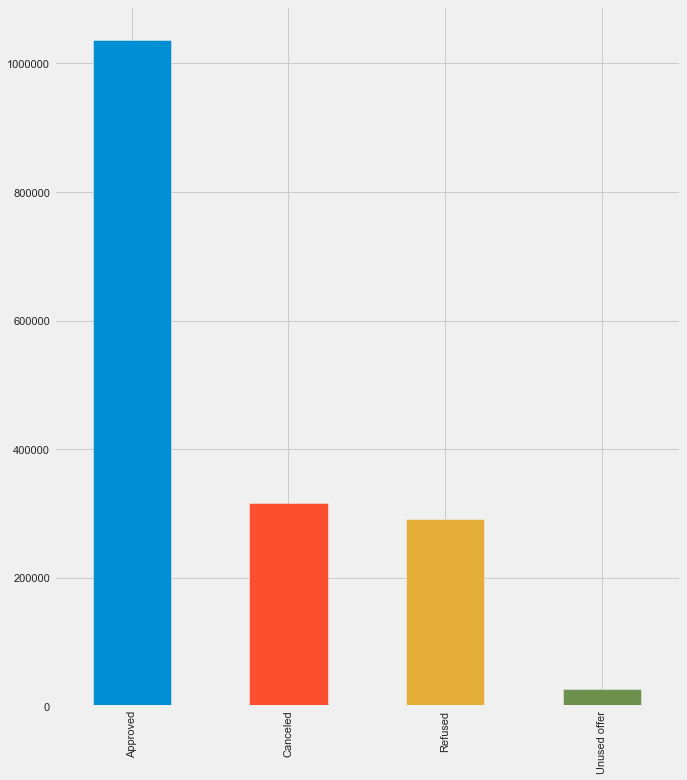

In [44]:
plt.figure(figsize=(10, 12))
df_previous_application_data['NAME_CONTRACT_STATUS'].value_counts().plot.bar()

<font color='blue'>

<b>The above graph shows the loan status. From this we can clearly see that high proportion of loans are getting approved. But we still see loans that are getting refused. We need to analyse the status along with other variable to see it's impact on loan rejection using bivariate or multivariate analysis </b>

</font>

# Explore NAME_CLIENT_TYPE along with NAME_CONTRACT_STATUS
### Bivariate analysis to understand the client type impact on loan status

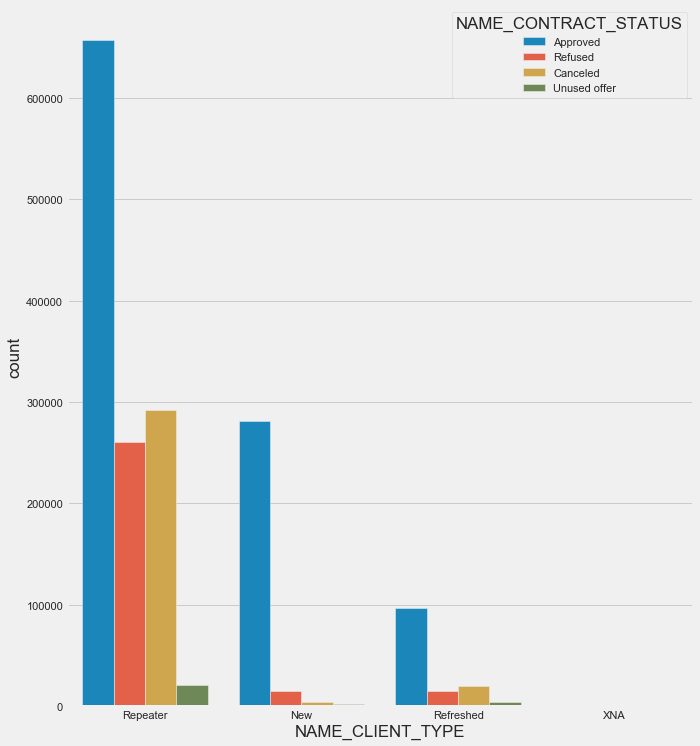

In [45]:
plt.figure(figsize=(10, 12))
sns.countplot('NAME_CLIENT_TYPE', data=df_previous_application_data, hue='NAME_CONTRACT_STATUS')

<font color='blue'>

<b>Compare to New and Refreshed type, the repeaters are getting more approved and rejected. Now, let us explore other variable with loan status </b>

</font>

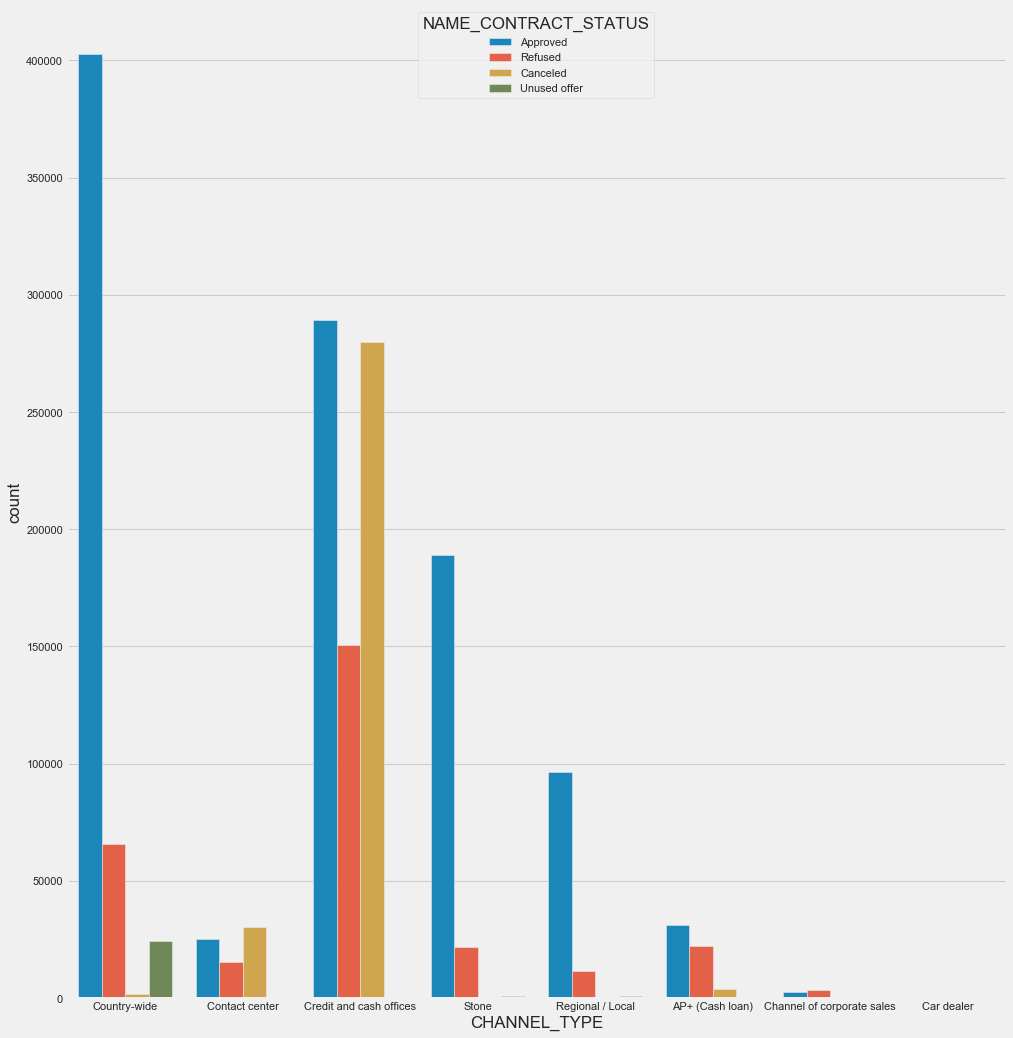

In [46]:
plt.figure(figsize=(15, 17))
sns.countplot('CHANNEL_TYPE', data=df_previous_application_data, hue='NAME_CONTRACT_STATUS')

<font color='blue'>

<b>We see an interesting insight on this graph where Credit and Case Offices approved loans are more approved and Rejected. We need to check the process how their are processing loans against other channels and establish a consistent process/documentation to avoid this. Remember, the rejected and unused loans are going to impact business and customer satisfaction. Also we see the propotion of loan handling from contact center and other channels are lower compare to Country-wide or Credit and Case Offices. This indicate that we need to focus improving business through other channels </b>

</font>

# Explore current loan application with previous loans

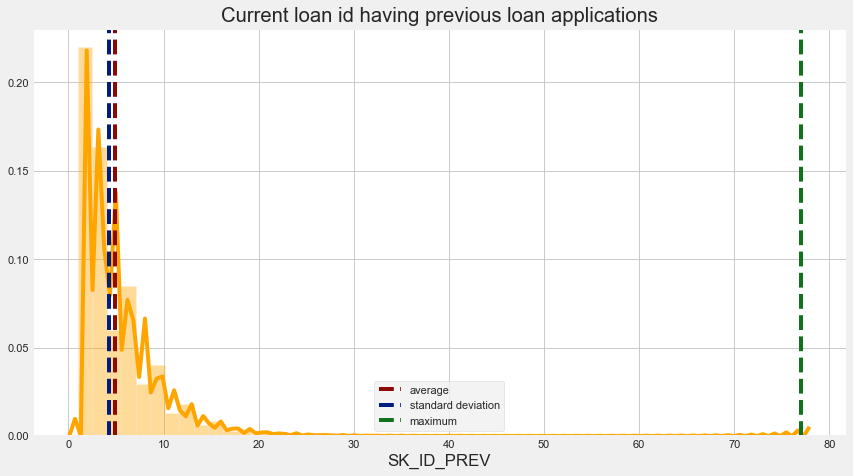

In [47]:
x = df_previous_application_data.groupby("SK_ID_CURR")["SK_ID_PREV"].count().reset_index()
plt.figure(figsize=(13,7))
ax = sns.distplot(x["SK_ID_PREV"],color="orange")
plt.axvline(x["SK_ID_PREV"].mean(),linestyle="dashed",color="r",label="average")
plt.axvline(x["SK_ID_PREV"].std(),linestyle="dashed",color="b",label="standard deviation")
plt.axvline(x["SK_ID_PREV"].max(),linestyle="dashed",color="g",label="maximum")
plt.legend(loc="best")
plt.title("Current loan id having previous loan applications")
ax.set_facecolor("w")

# Part3: Merge Application and Previous Application Data for Analysis

## On this part of the exploration, we will merge application and previous application data and explore variables that are impacting loan repayment


In [48]:
df_previous_loan_count = df_previous_application_data.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns={'SK_ID_PREV':'previous_loan_count'})
df_previous_loan_count.head(10)

,SK_ID_CURR,previous_loan_count
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2
5,100006,9
6,100007,6
7,100008,5
8,100009,7
9,100010,1


In [49]:
df_application_data = df_application_data.merge(df_previous_loan_count, on='SK_ID_CURR', how='left')
df_application_data[['SK_ID_CURR','previous_loan_count']].head(10)

,SK_ID_CURR,previous_loan_count
0,100002,1.0
1,100003,3.0
2,100004,1.0
3,100006,9.0
4,100007,6.0
5,100008,5.0
6,100009,7.0
7,100010,1.0
8,100011,4.0
9,100012,4.0


In [50]:
df_application_data['previous_loan_count'] = df_application_data['previous_loan_count'].fillna(0)
df_application_data[['SK_ID_CURR','previous_loan_count']].head(10)

,SK_ID_CURR,previous_loan_count
0,100002,1.0
1,100003,3.0
2,100004,1.0
3,100006,9.0
4,100007,6.0
5,100008,5.0
6,100009,7.0
7,100010,1.0
8,100011,4.0
9,100012,4.0


In [51]:
df_application_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,previous_loan_count
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,7.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,4.0


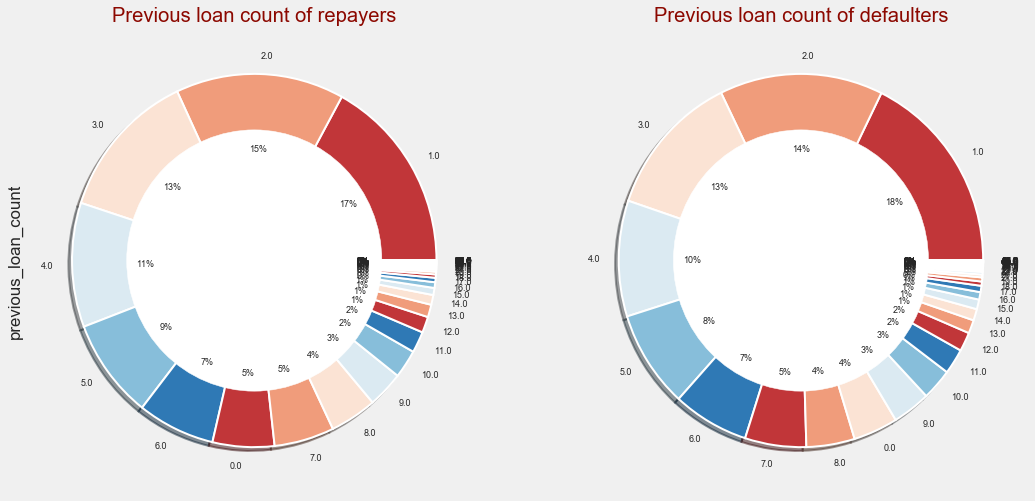

In [52]:
plt.figure(figsize=(16,8))
plt.subplot(121)
df_application_data[df_application_data["TARGET"]==0]["previous_loan_count"].value_counts().plot.pie(fontsize=9,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("RdBu"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Previous loan count of repayers",color="r")

plt.subplot(122)
df_application_data[df_application_data["TARGET"]==1]["previous_loan_count"].value_counts().plot.pie(fontsize=9,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("RdBu"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Previous loan count of defaulters",color="r")
plt.ylabel("")
plt.show()


<font color='blue'>

<b>We see consistency pattern in the repayers and defaulters for new and repeaters. There is no significant risk associated with approving repeated applicants</b>

</font>

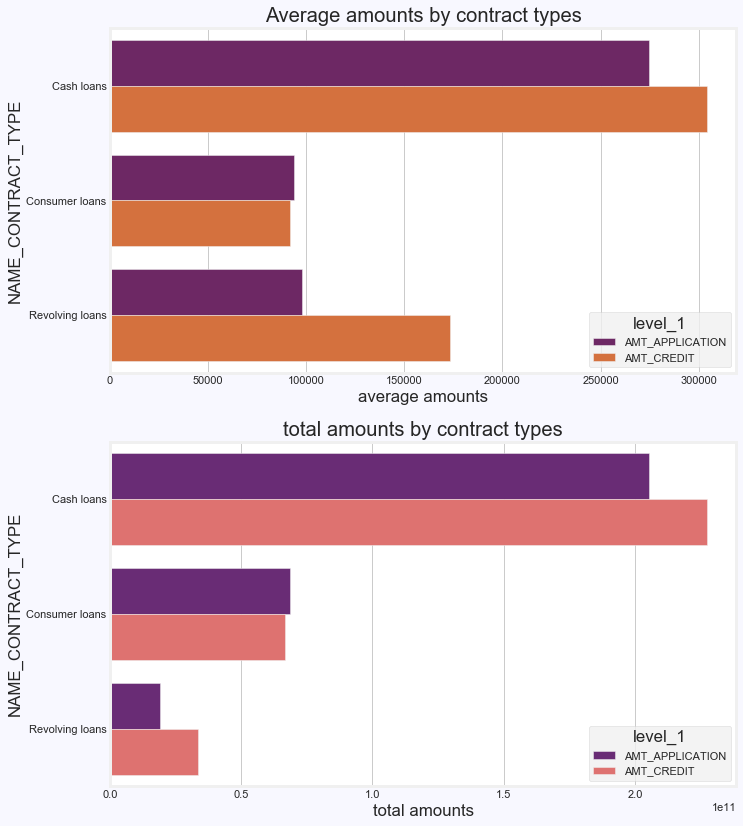

In [53]:
mn = df_previous_application_data.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].mean().stack().reset_index()
tt = df_previous_application_data.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].sum().stack().reset_index()
fig = plt.figure(figsize=(10,13))
fig.set_facecolor("ghostwhite")
plt.subplot(211)
ax = sns.barplot(0,"NAME_CONTRACT_TYPE",data=mn[:6],hue="level_1",palette="inferno")
ax.set_facecolor("w")
ax.set_xlabel("average amounts")
ax.set_title("Average amounts by contract types")

plt.subplot(212)
ax1 = sns.barplot(0,"NAME_CONTRACT_TYPE",data=tt[:6],hue="level_1",palette="magma")
ax1.set_facecolor("w")
ax1.set_xlabel("total amounts")
ax1.set_title("total amounts by contract types")
plt.subplots_adjust(hspace = .2)

<font color='blue'>

<b>We see some inconsistency between amount requested by the applicant on the previous application and the amount they have received as the final credit amount. This gives us the indication of some risk that finance organization is taking to grant amount more than customer applied for. Considering the approved ratio from the credit and cash offices, we see some gap on their process in approving loans. This flags a risk </b>

</font>

/Users/hariharansrinivasan/anaconda2/lib/python2.7/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


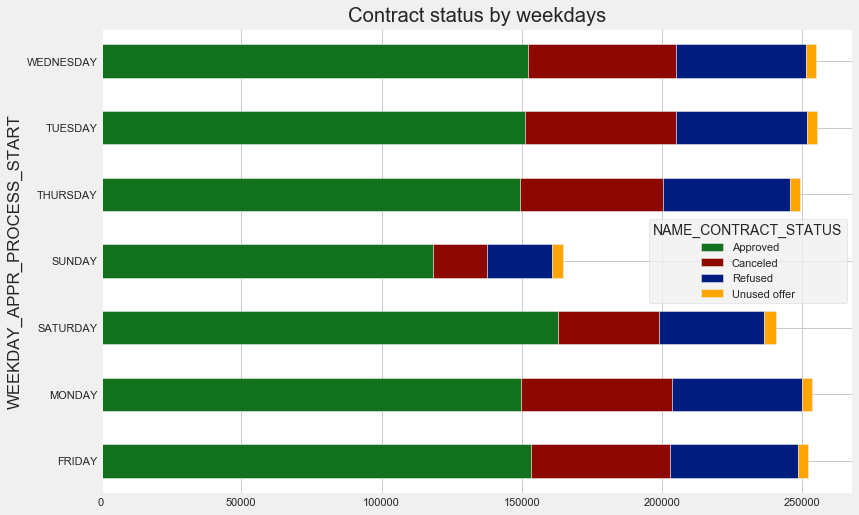

In [54]:
ax = pd.crosstab(df_previous_application_data["WEEKDAY_APPR_PROCESS_START"],df_previous_application_data["NAME_CONTRACT_STATUS"]).plot(kind="barh",colors=["g","r","b","orange"],
                                                                                                                  stacked =True,figsize=(12,8))
ax.set_facecolor("w")

ax.set_title("Contract status by weekdays")
plt.show()

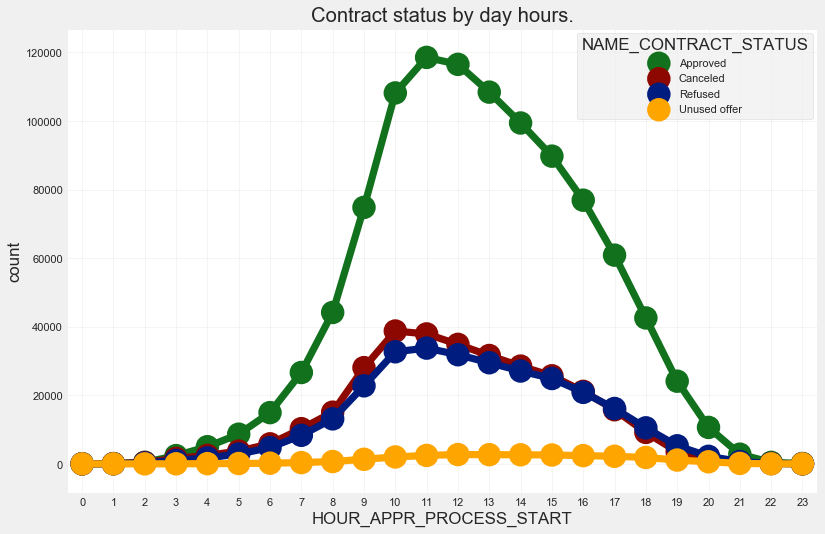

In [55]:
hr = pd.crosstab(df_previous_application_data["HOUR_APPR_PROCESS_START"],df_previous_application_data["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["HOUR_APPR_PROCESS_START"],hr[0],hue=hr["NAME_CONTRACT_STATUS"],palette=["g","r","b","orange"],scale=1)
ax.set_facecolor("w")
ax.set_ylabel("count")
ax.set_title("Contract status by day hours.")
plt.grid(True,alpha=.2)

<font color='blue'>

<b>There is some pattern on the hours applications are getting cancelled or rejected. Is this indicate a processing negligence or haste in rejection? Also customer getting the loans cancelled due to gap in the process. We need to review the interest rate or charges as well </b>

</font>

/Users/hariharansrinivasan/anaconda2/lib/python2.7/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


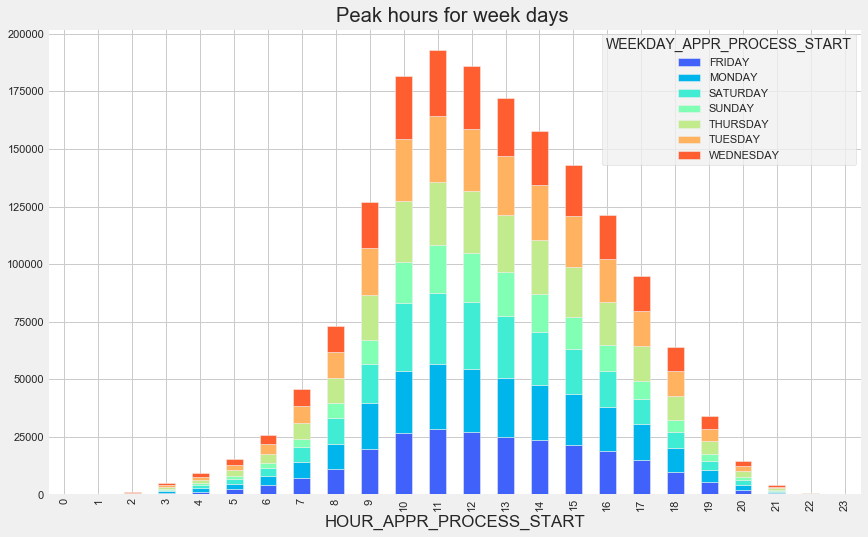

In [56]:
ax = pd.crosstab(df_previous_application_data["HOUR_APPR_PROCESS_START"],df_previous_application_data["WEEKDAY_APPR_PROCESS_START"]).plot(kind="bar",colors=sns.color_palette("rainbow",7),
                                                                                                                     figsize=(13,8),stacked=True)
ax.set_facecolor("w")
ax.set_title("Peak hours for week days ")
plt.show()

<font color='blue'>

<b>We may need to consider additional staffing or other channel to distribute the demand during peak hours </b>

</font>